- This dataset contains medical details of patients such as glucose level, BMI, age, and insulin.
- The goal is to predict whether a patient has diabetes or not
- The target variable is `Outcome`, where 1 indicates diabetes and 0 indicates no diabetes.


## Loading data set

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [3]:
df.shape

(768, 9)

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [9]:
df.duplicated().sum()

0

- target variable distribution

- in our data set in some columns there is 0 value present thst referes nothing in medical data so, replacing that value with **median**
-  columns are **'Glucose','BloodPressure','SkinThickness','Insulin','BMI'**

In [13]:
columns_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in columns_with_zero:
    df[col] = df[col].replace(0, df[col].median())


- visualizing the Diabaties outcome in the data set

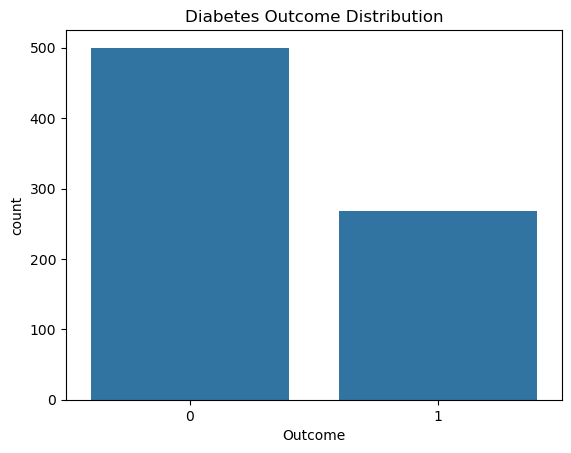

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


`observation`
- **1** referes to diabetes **YES**
- **2** referes to diabetes **NO**

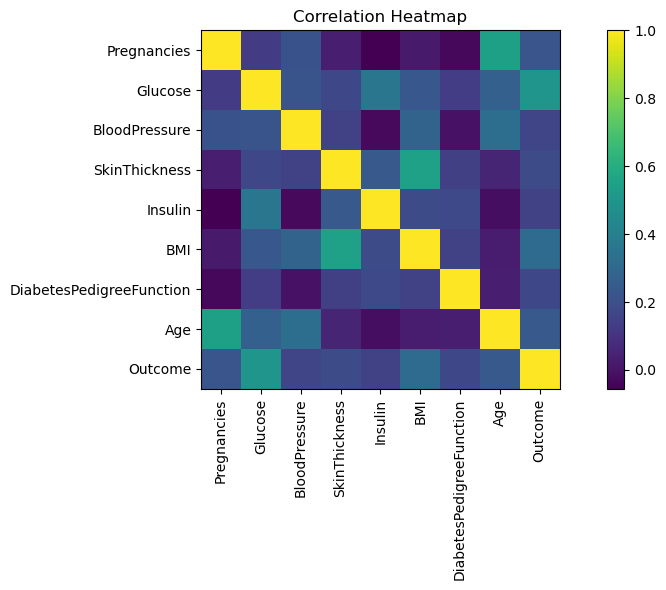

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Correlation matrix
corr = df.corr()

plt.figure(figsize=(10, 6))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


- Values close to +1 or -1 show strong correlation

- Helps detect multicollinearity

## Data Preprocessing

- x,y spliting of data

In [15]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [16]:
x.shape

(768, 8)

In [18]:
y.shape

(768,)

- Train Test Split of data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,72,23,30.5,32.0,0.304,21
618,9,112,82,24,30.5,28.2,1.282,50
346,1,139,46,19,83.0,28.7,0.654,22
294,0,161,50,23,30.5,21.9,0.254,65
231,6,134,80,37,370.0,46.2,0.238,46


In [22]:
X_train.shape

(614, 8)

In [23]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190.0,34.0,0.430,43
324,2,112,75,32,30.5,35.7,0.148,21
624,2,108,64,23,30.5,30.8,0.158,21
690,8,107,80,23,30.5,24.6,0.856,34
473,7,136,90,23,30.5,29.9,0.210,50


In [24]:
X_test.shape

(154, 8)

- Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Model Building

- Logistic Regression Algorithem **Model 1**

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

- KNN classifier **Model 2**

In [45]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)


KNeighborsClassifier()

- Random Forest Classifier **model3**

In [46]:
from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

- SVC **model4**

In [47]:
from sklearn.svm import SVC

model4 = SVC(kernel='rbf', probability=True)
model4.fit(X_train, y_train)


SVC(probability=True)

- Naive Bayes Classifier **model 5**

In [48]:
from sklearn.naive_bayes import GaussianNB

model5 = GaussianNB()
model5.fit(X_train, y_train)


GaussianNB()

## Evaluation Matrix

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

- model 1

In [50]:
y_test_pred=model.predict(X_test)

accuracy = accuracy_score(y_test,y_test_pred)
cm = confusion_matrix(y_test,y_test_pred)
cr = classification_report(y_test,y_test_pred)


print("\n Accuracy Score :",accuracy)
print("\n Confusion Matrix:\n\n",cm)
print("\n Classification Report:\n\n",cr)


 Accuracy Score : 0.7662337662337663

 Confusion Matrix:

 [[82 17]
 [19 36]]

 Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



- model 2

In [51]:
y_test_pred = model2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_test_pred)
cm2 = confusion_matrix(y_test, y_test_pred)
cr2 = classification_report(y_test, y_test_pred)

print("\n Accuracy Score :", accuracy2)
print("\n Confusion Matrix:\n\n", cm2)
print("\n Classification Report:\n\n", cr2)



 Accuracy Score : 0.7532467532467533

 Confusion Matrix:

 [[80 19]
 [19 36]]

 Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



- model 3

In [52]:
y_test_pred = model3.predict(X_test)

accuracy3 = accuracy_score(y_test, y_test_pred)
cm3 = confusion_matrix(y_test, y_test_pred)
cr3 = classification_report(y_test, y_test_pred)

print("\n Accuracy Score :", accuracy3)
print("\n Confusion Matrix:\n\n", cm3)
print("\n Classification Report:\n\n", cr3)



 Accuracy Score : 0.7662337662337663

 Confusion Matrix:

 [[80 19]
 [17 38]]

 Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



- model 4

In [53]:
y_test_pred = model4.predict(X_test)

accuracy4 = accuracy_score(y_test, y_test_pred)
cm4 = confusion_matrix(y_test, y_test_pred)
cr4 = classification_report(y_test, y_test_pred)

print("\n Accuracy Score :", accuracy4)
print("\n Confusion Matrix:\n\n", cm4)
print("\n Classification Report:\n\n", cr4)



 Accuracy Score : 0.7532467532467533

 Confusion Matrix:

 [[84 15]
 [23 32]]

 Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



- model 5

In [54]:
y_test_pred = model5.predict(X_test)

accuracy5 = accuracy_score(y_test, y_test_pred)
cm5 = confusion_matrix(y_test, y_test_pred)
cr5 = classification_report(y_test, y_test_pred)

print("\n Accuracy Score :", accuracy5)
print("\n Confusion Matrix:\n\n", cm5)
print("\n Classification Report:\n\n", cr5)



 Accuracy Score : 0.7532467532467533

 Confusion Matrix:

 [[78 21]
 [17 38]]

 Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



In [56]:
data= {
    "Algorithem":['Logistic Regression','K-NN classifier','Random Forest Classifier','SVC','Naive Bayes'],
    "Accuracy":[accuracy,accuracy2,accuracy3,accuracy4,accuracy5]}

new_df=pd.DataFrame(data)

In [57]:
new_df

,Algorithem,Accuracy
0,Logistic Regression,0.766234
1,K-NN classifier,0.753247
2,Random Forest Classifier,0.766234
3,SVC,0.753247
4,Naive Bayes,0.753247


In [59]:
new_df.loc[new_df['Accuracy'].idxmax()]

Algorithem    Logistic Regression
Accuracy                 0.766234
Name: 0, dtype: object

### after comparing different models

- Multiple machine learning algorithms were applied for diabetes detection.
- **Logistic Regression and Random Forest** achieved the highest **accuracy (76.62%)**.
- **K-NN, SVM, and Naive Bayes** showed slightly lower performance.
- Model comparison helped in selecting the best algorithm.
- Random Forest and Logistic Regression are suitable for diabetes prediction.


## Conclusion

- This project successfully implemented machine learning techniques for diabetes disease detection.
- Data preprocessing and feature scaling improved model performance.
- Multiple algorithms were trained and evaluated to compare results.
- Logistic Regression and Random Forest achieved the highest accuracy (76.62%).
- Model evaluation helped identify the most reliable algorithms.
- The project demonstrates how machine learning can assist in early disease prediction.
